In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
import random
%matplotlib inline

1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [2]:
# 1.Загрузить файл hr.csv.
data = pd.read_csv("C:\\Users\\yusuper\\Desktop\\win_7\\pyda\\HR.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
len(data)

14999

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение). 

In [5]:
# Рассчитаю для satisfaction_level
statistics.mean(data['satisfaction_level']) # среднее

0.6128335222348157

In [6]:
#медиана
statistics.median(data['satisfaction_level'])

0.64

In [7]:
#мода
statistics.mode(data['satisfaction_level'])

0.1

In [8]:
#min
data['satisfaction_level'].min()

0.09

In [9]:
#max
data['satisfaction_level'].max()

1.0

In [10]:
# стандартное отклонение
data["satisfaction_level"].std()

0.2486306510611418

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [12]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


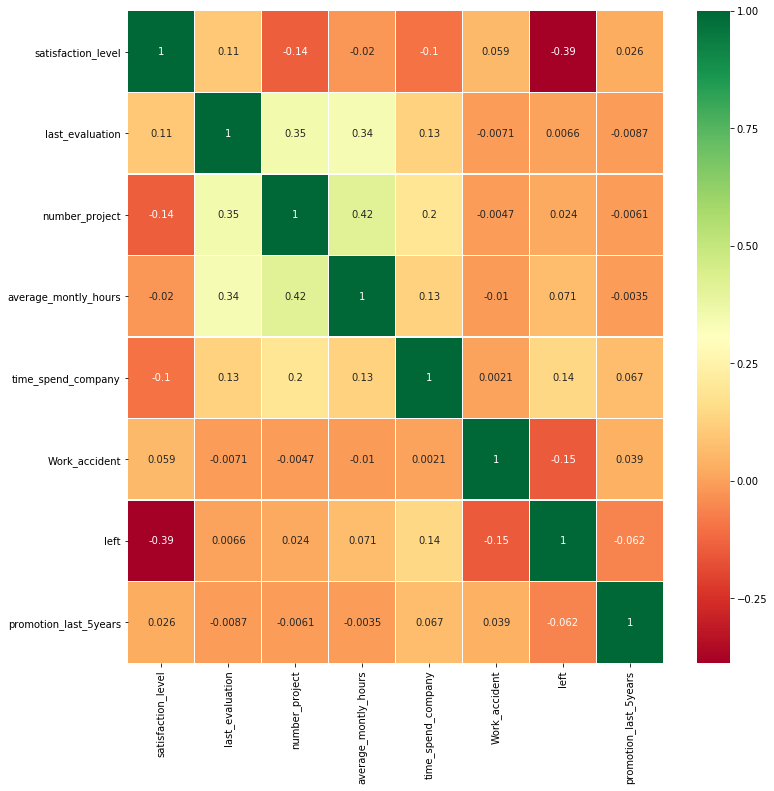

In [13]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

4.Визуализировать несколько взаимосвязей между переменными.

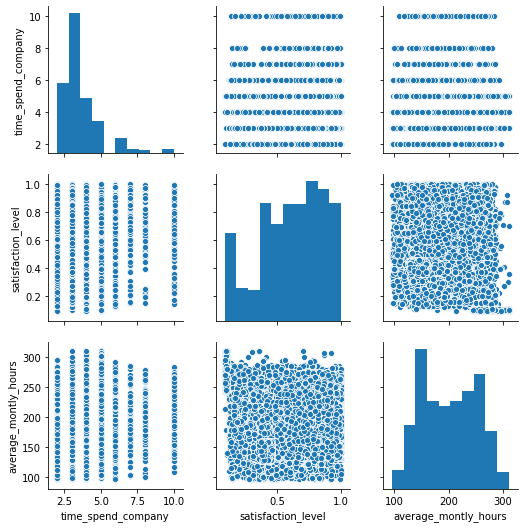

In [16]:
sns_plot = sns.pairplot(
    data[['time_spend_company', 'satisfaction_level', 'average_montly_hours']])
sns_plot

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными. 

взаимосвязь между уровнем удовлетворения и сроком работы в компании:

In [22]:
data['satisfaction_level'].min()

0.09

In [23]:
data['satisfaction_level'].max()

1.0

In [24]:
data['satisfaction_level'].mode()

0    0.1
dtype: float64

In [38]:
satlevel_time_high = data[data['satisfaction_level']>0.8]['time_spend_company']
satlevel_time_low = data[data['satisfaction_level']<0.5]['time_spend_company']                    
stats.ttest_ind(satlevel_time_high,satlevel_time_low)

Ttest_indResult(statistic=-6.154597709745177, pvalue=7.86420851517574e-10)

взаимосвязь между средним количеством часов в месяц и сроком работы в компании:

In [33]:
data['average_montly_hours'].min()

96

In [35]:
data['average_montly_hours'].max()

310

In [36]:
data['average_montly_hours'].mode()

0    135
1    156
dtype: int64

In [37]:
work_hours_high = data[data['average_montly_hours']>200]['time_spend_company']

work_hours_low = data[data['average_montly_hours']<150]['time_spend_company']

stats.ttest_ind(work_hours_high, work_hours_low)

Ttest_indResult(statistic=9.49306681235447, pvalue=2.7347093833251806e-21)

Судя по значению p-value меньшее нуля нет статистической зависимости между уровнем удовлетворения или среднее количсество часов, проведенных на работе с годами работы.

6.Рассчитать сколько работников работает в каждом департаменте.

In [52]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

7.Показать распределение сотрудников по зарплатам.

In [53]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [63]:
data[['sales', 'salary']].sort_values(by=['sales', 'salary'], ascending=[False, True]).head()

,sales,salary
189,technical,high
267,technical,high
345,technical,high
423,technical,high
462,technical,high


9.Сколько сотрудников покинули компанию.

In [66]:
len(data[(data['left']== 1)])

3571

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Гипотеза № 1. Сотрудники покидают компанию, потому работали больше часов в месяц

In [68]:
left_hours = data[data['left']==1]['average_montly_hours']

remained_hours = data[data['left']==0]['average_montly_hours']

stats.ttest_ind(left_hours, remained_hours)

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

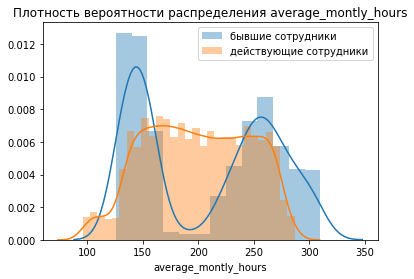

In [69]:
sns.distplot(left_hours)
sns.distplot(remained_hours)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['бывшие сотрудники', 'действующие сотрудники'])
plt.show()

Гипотеза № 2. Сотрудники покидают компанию, потому что вели несколько проектов одновременно

In [70]:
left_prjts = data[data['left']==1]['number_project']

remained_prjts = data[data['left']==0]['number_project']

stats.ttest_ind(left_prjts, remained_prjts)

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)

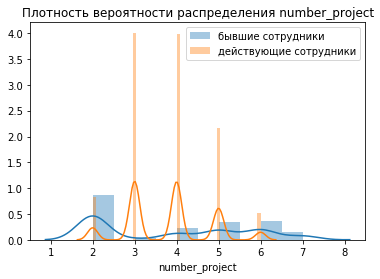

In [71]:
sns.distplot(left_prjts)
sns.distplot(remained_prjts)
plt.title('Плотность вероятности распределения number_project')
plt.legend(['бывшие сотрудники', 'действующие сотрудники'])
plt.show()

Гипотеза 3. Покидают компанию сотрудники с низким уровнем удовлетворения.

In [72]:
left_satL = data[data['left']==1]['satisfaction_level']

remained_satL= data[data['left']==0]['satisfaction_level']

stats.ttest_ind(left_satL, remained_satL)


Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

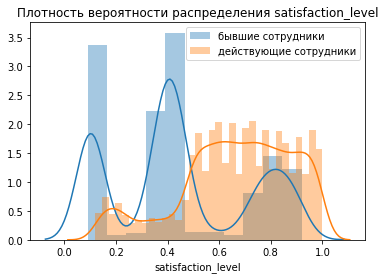

In [73]:
sns.distplot(left_satL)
sns.distplot(remained_satL)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['бывшие сотрудники', 'действующие сотрудники'])
plt.show()

Значения pvalue во всех 3 гипотезах меньше 0,05, что говорит о том, что гипотезы верны.